In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D
from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.netpros import *
from lib.syn import *
from lib.experiments import *
from lib.static import *
from lib.datasets import *

In [2]:
F = numpy.array([8., 10., 10., -4., -6., -9., -9])

G = networkx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(5,6)

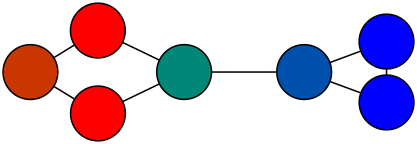

In [3]:
set_f(G, F)
draw_graph_with_values(G, "running.dot")

!sfdp -Goverlap=prism -Tsvg running.dot > running.svg

from IPython.display import SVG

SVG(filename='running.svg')

In [3]:
#alg = OptWavelets(2)
alg = GNCWavelets()
alg.set_graph(G)
tr = alg.transform(F)
#appx_tr = alg.drop_frequency(tr, 2)


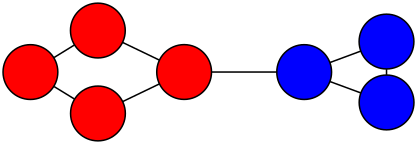

In [4]:
def partitions_avg(parts, G, F):
    i = 0
    avg_F = []
    ind = {}
    for v in G.nodes():
        ind[v] = i
        i = i + 1
        avg_F.append(0)
    
    
    for p in range(len(parts)):
        avg = 0
        for i in range(len(parts[p])):
            avg = avg + F[ind[parts[p][i]]]
        avg = float(avg) / len(parts[p])
        
        for i in range(len(parts[p])):
             avg_F[ind[parts[p][i]]] = avg
            
    return avg_F

parts = partitions_level(alg.tree, 1, G)
avgs = partitions_avg(parts, G, F)
set_f(G, avgs)
draw_graph_with_values(G, "running.dot")

!sfdp -Goverlap=prism -Tsvg running.dot > running.svg

from IPython.display import SVG

SVG(filename='running.svg')